# Exploraty Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_accounts = pd.read_csv("../data/raw/crm-sales-opportunities/accounts.csv")
df_products = pd.read_csv("../data/raw/crm-sales-opportunities/products.csv")
df_teams = pd.read_csv("../data/raw/crm-sales-opportunities/sales_teams.csv")
df_sales = pd.read_csv(
    "../data/raw/crm-sales-opportunities/sales_pipeline.csv")


## Sales pipeline

### Cleaning

In [ ]:
df_sales.head(10)


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0
5,ZNBS69V1,Anna Snelling,MG Special,Ron-tech,Won,2016-10-29,2017-03-01,49.0
6,9ME3374G,Vicki Laflamme,MG Special,J-Texon,Won,2016-10-30,2017-03-02,57.0
7,7GN8Q4LL,Markita Hansen,GTX Basic,Cheers,Won,2016-11-01,2017-03-07,601.0
8,OLK9LKZB,Niesha Huffines,GTX Plus Basic,Zumgoity,Won,2016-11-01,2017-03-03,1026.0
9,HAXMC4IX,James Ascencio,MG Advanced,NaN,Engaging,2016-11-03,NaN,NaN


Remove non relevant rows where the deal is still in progress:

In [ ]:
df = df_sales.copy().dropna(subset=['close_value'])
total_sales = df_sales.shape[0]
actual_sales = df.shape[0]
print(f"{total_sales} sales in total")
print(f"{actual_sales} actual sales")
print(f"{total_sales - actual_sales} still prospecting")


8800 sales in total
6711 actual sales
2089 still prospecting


There are only two type of sale status: `Won` or `Lost`:

In [ ]:
df['deal_stage'].unique()


array(['Won', 'Lost'], dtype=object)

Transform this into a binary column:

In [ ]:
df['deal_stage'] = df['deal_stage'].apply(
    lambda x: 1 if x.lower() == 'won' else 0)
df['deal_stage'].value_counts()


deal_stage
1    4238
0    2473
Name: count, dtype: int64

Transform dates and integers columns:

In [ ]:
df['engage_date'] = pd.to_datetime(df['engage_date'])
df['close_date'] = pd.to_datetime(df['close_date'])
df['close_value'] = pd.to_numeric(df['close_value'], downcast='integer')


Get the duration of sale closing:

In [ ]:
df['duration'] = (df['close_date'] - df['engage_date']).dt.days
df['duration'] = pd.to_numeric(df['duration'], downcast='integer')


Remove non useful columns:

In [ ]:
df.drop(columns=['opportunity_id', 'engage_date', 'close_date'], inplace=True)


The rest of the columns are strings:

In [ ]:
for col in ['sales_agent', 'product', 'account']:
    df[col] = df[col].astype('string')


In [ ]:
df.dtypes


sales_agent    string[python]
product        string[python]
account        string[python]
deal_stage              int64
close_value             int16
duration                int16
dtype: object

In [ ]:
df


,sales_agent,product,account,deal_stage,close_value,duration
0,Moses Frase,GTX Plus Basic,Cancity,1,1054,132
1,Darcel Schlecht,GTXPro,Isdom,1,4514,137
2,Darcel Schlecht,MG Special,Cancity,1,50,133
3,Moses Frase,GTX Basic,Codehow,1,588,135
4,Zane Levy,GTX Basic,Hatfan,1,517,128
...,...,...,...,...,...,...
8295,Lajuana Vencill,GTX Basic,Conecom,1,622,2
8296,Violet Mclelland,GTX Plus Basic,Bluth Company,1,1093,6
8297,Maureen Marcano,GTXPro,Hottechi,1,4433,3
8298,Gladys Colclough,GTX Plus Basic,Inity,1,1052,3


### Exploration

Enrich the sales team with aggregated data from sales and visualize the distribution:

In [ ]:
df


,sales_agent,product,account,deal_stage,close_value,duration
0,Moses Frase,GTX Plus Basic,Cancity,1,1054,132
1,Darcel Schlecht,GTXPro,Isdom,1,4514,137
2,Darcel Schlecht,MG Special,Cancity,1,50,133
3,Moses Frase,GTX Basic,Codehow,1,588,135
4,Zane Levy,GTX Basic,Hatfan,1,517,128
...,...,...,...,...,...,...
6706,Lajuana Vencill,GTX Basic,Conecom,1,622,2
6707,Violet Mclelland,GTX Plus Basic,Bluth Company,1,1093,6
6708,Maureen Marcano,GTXPro,Hottechi,1,4433,3
6709,Gladys Colclough,GTX Plus Basic,Inity,1,1052,3


In [ ]:
if 'sector' not in df.columns:
    df = pd.merge(
        df, df_accounts[['account', 'sector']], on='account', how='left')

df['sector'].value_counts()


sector
retail                1267
technolgy             1058
medical                950
software               704
marketing              623
finance                613
telecommunications     456
entertainment          402
services               352
employment             286
Name: count, dtype: int64

In [ ]:
sum_by_agent = df.groupby('sales_agent').aggregate(
    deals_won=('deal_stage', lambda x: (x == 1).sum()),
    deals_lost=('deal_stage', lambda x: (x == 0).sum()),
    value_total=('close_value', 'sum'),
    value_median=('close_value', 'median'),
    duration_median=('duration', 'median')
)
agents = df_teams.merge(sum_by_agent, on="sales_agent", how="left")
agents.dropna(inplace=True)
agents.sort_values(by='value_total')
agents.head(10)


,sales_agent,manager,regional_office,deals_won,deals_lost,value_total,value_median,duration_median
0,Anna Snelling,Dustin Brinkmann,Central,208.0,128.0,275056.0,54.0,55.5
1,Cecily Lampkin,Dustin Brinkmann,Central,107.0,53.0,229800.0,470.0,15.0
2,Versie Hillebrand,Dustin Brinkmann,Central,176.0,88.0,187693.0,54.0,34.0
3,Lajuana Vencill,Dustin Brinkmann,Central,127.0,104.0,194632.0,56.0,61.0
4,Moses Frase,Dustin Brinkmann,Central,129.0,66.0,207182.0,465.0,66.0
5,Jonathan Berthelot,Melvin Marxen,Central,171.0,93.0,284886.0,519.0,54.5
6,Marty Freudenburg,Melvin Marxen,Central,122.0,72.0,291195.0,552.5,30.5
7,Gladys Colclough,Melvin Marxen,Central,135.0,97.0,345674.0,55.0,50.0
8,Niesha Huffines,Melvin Marxen,Central,105.0,70.0,176961.0,491.0,49.0
9,Darcel Schlecht,Melvin Marxen,Central,349.0,204.0,1153214.0,984.0,32.0


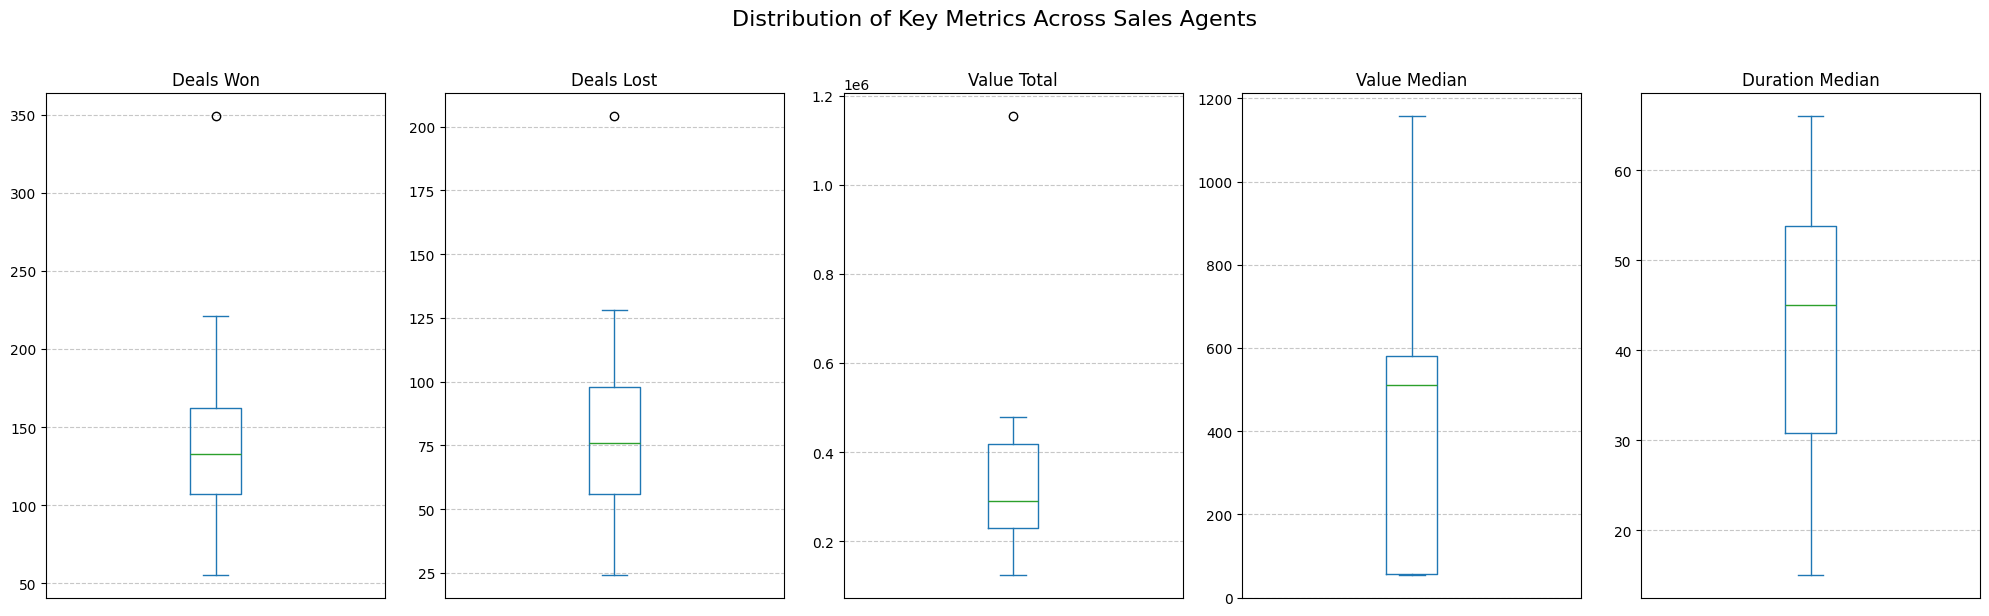

In [ ]:
numerical_cols_for_boxplot = [
    'deals_won', 'deals_lost', 'value_total', 'value_median', 'duration_median']

fig, axes = plt.subplots(1, len(numerical_cols_for_boxplot), figsize=(20, 6))
axes = axes.flatten()
for i, col in enumerate(numerical_cols_for_boxplot):
    agents[col].plot(kind='box', ax=axes[i])
    axes[i].set_title(f'{col.replace("_", " ").title()}')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', which='both', bottom=False,
                        top=False, labelbottom=False)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

fig.suptitle('Distribution of Key Metrics Across Sales Agents',
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


Top salers:

In [ ]:
agents.sort_values(by='deals_won', ascending=False).head(10)


,sales_agent,manager,regional_office,deals_won,deals_lost,value_total,value_median,duration_median
9,Darcel Schlecht,Melvin Marxen,Central,349.0,204.0,1153214.0,984.0,32.0
23,Vicki Laflamme,Celia Rouche,West,221.0,126.0,478396.0,64.0,41.0
30,Kary Hendrixson,Summer Sewald,West,209.0,126.0,454298.0,516.0,52.0
0,Anna Snelling,Dustin Brinkmann,Central,208.0,128.0,275056.0,54.0,55.5
2,Versie Hillebrand,Dustin Brinkmann,Central,176.0,88.0,187693.0,54.0,34.0
31,Kami Bicknell,Summer Sewald,West,174.0,98.0,316456.0,506.0,39.5
5,Jonathan Berthelot,Melvin Marxen,Central,171.0,93.0,284886.0,519.0,54.5
18,Cassey Cress,Rocco Neubert,East,163.0,98.0,450489.0,582.0,32.0
32,Zane Levy,Summer Sewald,West,161.0,100.0,430068.0,518.0,27.0
19,Donn Cantrell,Rocco Neubert,East,158.0,117.0,445860.0,533.0,51.0


In [ ]:
agents.sort_values(by='value_total', ascending=False).head(10)


,sales_agent,manager,regional_office,deals_won,deals_lost,value_total,value_median,duration_median
9,Darcel Schlecht,Melvin Marxen,Central,349.0,204.0,1153214.0,984.0,32.0
23,Vicki Laflamme,Celia Rouche,West,221.0,126.0,478396.0,64.0,41.0
30,Kary Hendrixson,Summer Sewald,West,209.0,126.0,454298.0,516.0,52.0
18,Cassey Cress,Rocco Neubert,East,163.0,98.0,450489.0,582.0,32.0
19,Donn Cantrell,Rocco Neubert,East,158.0,117.0,445860.0,533.0,51.0
20,Reed Clapper,Rocco Neubert,East,155.0,82.0,438336.0,585.0,16.0
32,Zane Levy,Summer Sewald,West,161.0,100.0,430068.0,518.0,27.0
12,Corliss Cosme,Cara Losch,East,150.0,79.0,421036.0,586.0,36.0
29,James Ascencio,Summer Sewald,West,135.0,71.0,413533.0,539.0,51.5
17,Daniell Hammack,Rocco Neubert,East,114.0,73.0,364229.0,971.0,30.0


Analyze the distribution of **closed vs lost sales** duration:

In [ ]:
def get_duration_count(df: pd.DataFrame) -> pd.DataFrame:
    duration_counts = df['duration'].value_counts()
    duration_counts = pd.Series(duration_counts).reset_index()
    duration_counts.columns = ['duration', 'count']
    duration_counts = duration_counts.sort_values(by='duration')
    return duration_counts


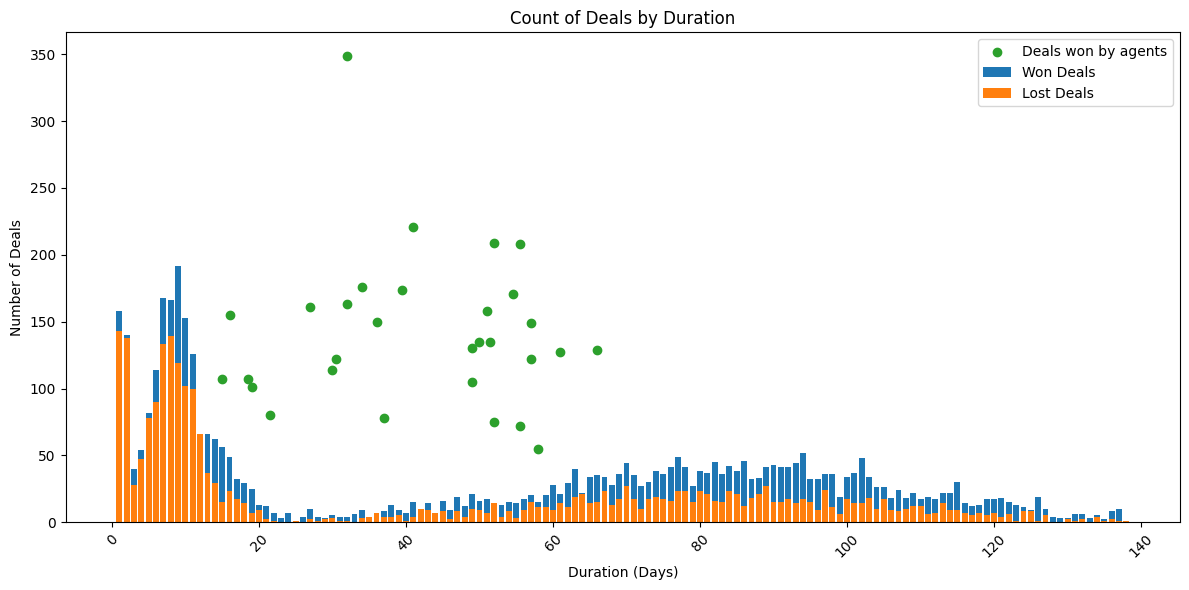

In [ ]:
won_deals = df[df['close_value'] > 0]
won_duration_counts = get_duration_count(won_deals)

lost_deals = df[df['close_value'] <= 0]
lost_duration_counts = get_duration_count(lost_deals)

plt.figure(figsize=(12, 6))
plt.bar(height=won_duration_counts['count'],
        x=won_duration_counts['duration'],
        label='Won Deals')
plt.bar(height=lost_duration_counts['count'],
        x=lost_duration_counts['duration'],
        label='Lost Deals')
plt.scatter(y=agents['deals_won'],
            x=agents['duration_median'],
            label="Deals won by agents")
plt.title('Count of Deals by Duration')
plt.xlabel('Duration (Days)')
plt.ylabel('Number of Deals')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
df


,sales_agent,product,account,deal_stage,close_value,duration
0,Moses Frase,GTX Plus Basic,Cancity,1,1054,132
1,Darcel Schlecht,GTXPro,Isdom,1,4514,137
2,Darcel Schlecht,MG Special,Cancity,1,50,133
3,Moses Frase,GTX Basic,Codehow,1,588,135
4,Zane Levy,GTX Basic,Hatfan,1,517,128
...,...,...,...,...,...,...
8295,Lajuana Vencill,GTX Basic,Conecom,1,622,2
8296,Violet Mclelland,GTX Plus Basic,Bluth Company,1,1093,6
8297,Maureen Marcano,GTXPro,Hottechi,1,4433,3
8298,Gladys Colclough,GTX Plus Basic,Inity,1,1052,3
